In [1]:
#imports
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

##### Data Retrieval

In [2]:
data=pd.read_csv('customer_segmentation - customer_segmentation.csv')

In [7]:
data.shape

(10127, 14)

In [5]:
data.describe()

,customer_id,age,dependent_count,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,62078.206774,35.928409,3.812580,2.341167,8631.953698,4404.086304,64.858695,0.274894
std,3.690378e+07,8.016814,1.298908,39372.861291,7.986416,1.554408,1.010622,9088.776650,3397.129254,23.472570,0.275691
min,7.080821e+08,26.000000,0.000000,20000.000000,13.000000,1.000000,0.000000,1438.300000,510.000000,10.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,32000.000000,31.000000,3.000000,2.000000,2555.000000,2155.500000,45.000000,0.023000
50%,7.179264e+08,46.000000,2.000000,50000.000000,36.000000,4.000000,2.000000,4549.000000,3899.000000,67.000000,0.176000
75%,7.731435e+08,52.000000,3.000000,80000.000000,40.000000,5.000000,3.000000,11067.500000,4741.000000,81.000000,0.503000
max,8.283431e+08,73.000000,5.000000,200000.000000,56.000000,6.000000,6.000000,34516.000000,18484.000000,139.000000,0.999000


In [9]:
data.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000


##### Advanced Data Analysis

In [8]:
data.corr()

,customer_id,age,dependent_count,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
customer_id,1.000000,0.007613,0.006772,0.015787,0.134588,0.006907,0.005729,0.005708,-0.019692,-0.002961,0.000266
age,0.007613,1.000000,-0.122254,0.032922,0.788912,-0.010931,0.054361,0.002476,-0.046446,-0.067097,0.007114
dependent_count,0.006772,-0.122254,1.000000,0.051620,-0.103062,-0.039076,-0.010768,0.068065,0.025046,0.049912,-0.037135
estimated_income,0.015787,0.032922,0.051620,1.000000,0.027628,-0.007181,-0.002703,0.515863,0.015861,-0.039988,-0.277532
months_on_book,0.134588,0.788912,-0.103062,0.027628,1.000000,-0.009203,0.074164,0.007507,-0.038591,-0.049819,-0.007541
total_relationship_count,0.006907,-0.010931,-0.039076,-0.007181,-0.009203,1.000000,-0.003675,-0.071386,-0.347229,-0.241891,0.067663
months_inactive_12_mon,0.005729,0.054361,-0.010768,-0.002703,0.074164,-0.003675,1.000000,-0.020394,-0.036982,-0.042787,-0.007503
credit_limit,0.005708,0.002476,0.068065,0.515863,0.007507,-0.071386,-0.020394,1.000000,0.171730,0.075927,-0.482965
total_trans_amount,-0.019692,-0.046446,0.025046,0.015861,-0.038591,-0.347229,-0.036982,0.171730,1.000000,0.807192,-0.083034
total_trans_count,-0.002961,-0.067097,0.049912,-0.039988,-0.049819,-0.241891,-0.042787,0.075927,0.807192,1.000000,0.002838


In [10]:
for x in data.columns:
    print(x, data[x].isnull().sum())

customer_id 0
age 0
gender 0
dependent_count 0
education_level 0
marital_status 0
estimated_income 0
months_on_book 0
total_relationship_count 0
months_inactive_12_mon 0
credit_limit 0
total_trans_amount 0
total_trans_count 0
avg_utilization_ratio 0


In [12]:
data.dtypes

customer_id                   int64
age                           int64
gender                       object
dependent_count               int64
education_level              object
marital_status               object
estimated_income              int64
months_on_book                int64
total_relationship_count      int64
months_inactive_12_mon        int64
credit_limit                float64
total_trans_amount            int64
total_trans_count             int64
avg_utilization_ratio       float64
dtype: object

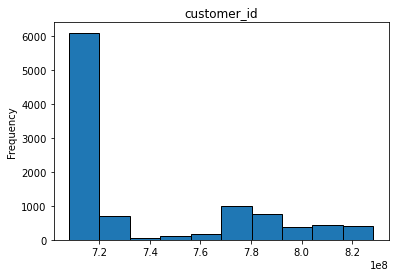

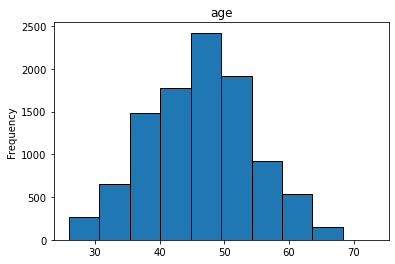

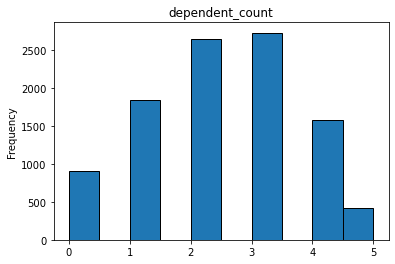

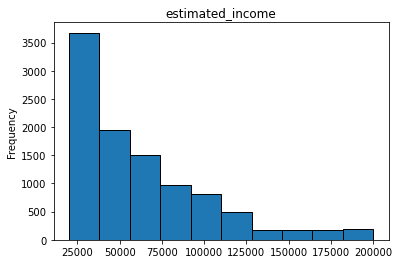

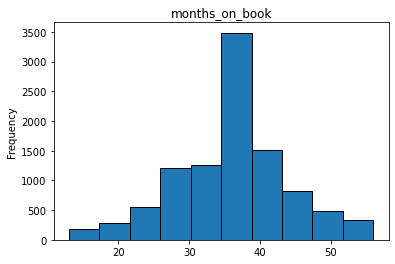

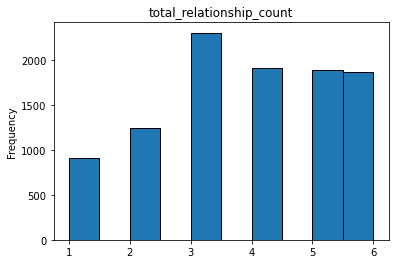

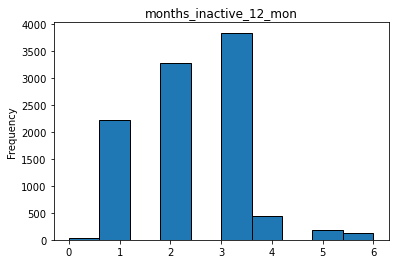

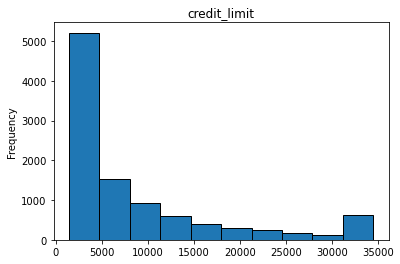

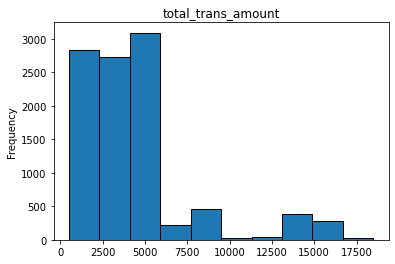

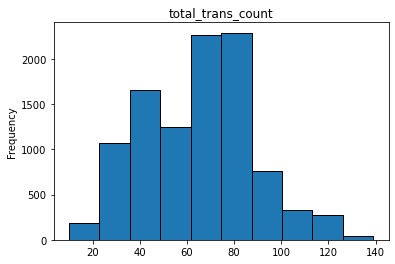

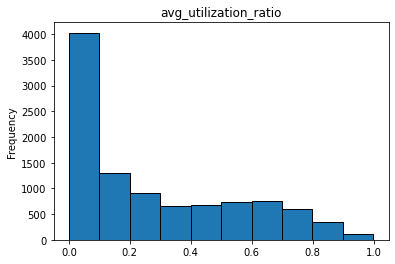

In [15]:

for col in data.columns:
    try:
        data[col].plot(kind='hist', edgecolor='black')
        plt.title(col)
        plt.show()
    except:
        pass

This dataset has 14 columns and 10127 rows. 3 of the columns are object type and the rest are numerical columns. We will want to drop the customer Id column because it doesn't give us any information for the clusters. There are no missing values in this dataset. We see strong correlations between the age and months on book and between total trans amount and total trans count. We see that credit limit, estimated income, and avg utilization ratio are right-skewed. Age and month on book are normal skewed.

##### Data Preparation 


In [16]:
customers_modif=data.copy()

In [17]:
customers_modif['gender']=customers_modif['gender'].map({'M': 1, 'F': 0})

In [18]:
customers_modif['education_level']=customers_modif['education_level'].map({'Uneducated' : 0,'High School': 1,'College' : 2, 'Graduate' : 3,'Post-Graduate': 4,'Doctorate' : 5})

In [19]:
customers_modif=pd.get_dummies(customers_modif, columns=['marital_status'])

In [20]:
customers_modif.head()

,customer_id,age,gender,dependent_count,education_level,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,marital_status_Divorced,marital_status_Married,marital_status_Single,marital_status_Unknown
0,768805383,45,1,3,1,69000,39,5,1,12691.0,1144,42,0.061,0,1,0,0
1,818770008,49,0,5,3,24000,44,6,1,8256.0,1291,33,0.105,0,0,1,0
2,713982108,51,1,3,3,93000,36,4,1,3418.0,1887,20,0.000,0,1,0,0
3,769911858,40,0,4,1,37000,34,3,4,3313.0,1171,20,0.760,0,0,0,1
4,709106358,40,1,3,0,65000,21,5,1,4716.0,816,28,0.000,0,1,0,0


In [22]:
customers_modif=customers_modif.drop('customer_id',axis=1)

In [25]:
ssc=StandardScaler()
customers_modif_scaled=ssc.fit_transform(customers_modif)

In [32]:
customers_modif_scaled=pd.DataFrame(customers_modif_scaled, columns = [customers_modif.columns])

##### KMeans model

In [35]:
inertia=[]
for k in range(1,11):
    kmeans= KMeans(n_clusters=k)
    kmeans.fit_predict(customers_modif_scaled)
    inertia.append(kmeans.inertia_)

c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(
c:\Users\admin\anaconda3\lib\site-packages\sklea

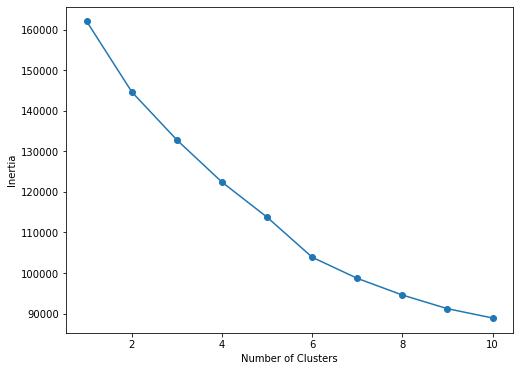

In [36]:
plt.figure(figsize=(8,6))
plt.plot(np.arange(1, 11), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

I would choose 6 clusters because until that point you could see a steeper curve. 

In [40]:
kmeans1= KMeans(n_clusters=6)
kmeans1.fit_predict(customers_modif_scaled)

c:\Users\admin\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  warnings.warn(


array([4, 3, 4, ..., 1, 2, 1])

In [60]:
data['CLUSTER']=kmeans1.labels_
data.head()

,customer_id,age,gender,dependent_count,education_level,marital_status,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,CLUSTER
0,768805383,45,M,3,High School,Married,69000,39,5,1,12691.0,1144,42,0.061,4
1,818770008,49,F,5,Graduate,Single,24000,44,6,1,8256.0,1291,33,0.105,3
2,713982108,51,M,3,Graduate,Married,93000,36,4,1,3418.0,1887,20,0.000,4
3,769911858,40,F,4,High School,Unknown,37000,34,3,4,3313.0,1171,20,0.760,2
4,709106358,40,M,3,Uneducated,Married,65000,21,5,1,4716.0,816,28,0.000,1


##### Model analysis

In [59]:
a=data.groupby('CLUSTER').mean()
a.head()

,customer_id,age,dependent_count,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio
CLUSTER,,,,,,,,,,,
0,7.367324e+08,45.287197,2.331027,69664.359862,35.068051,2.174164,2.188005,14830.776240,13128.253749,106.014994,0.162551
1,7.391619e+08,46.856924,2.300245,46829.656863,36.353860,4.003676,2.338542,4186.408425,3253.305760,57.822610,0.367379
2,7.407606e+08,45.612162,2.547297,61691.891892,35.216216,3.779730,2.329730,9283.944730,4590.452703,66.527027,0.258372
3,7.386068e+08,46.074164,2.238858,46905.988858,35.734680,3.919220,2.371866,4973.249199,3725.145543,64.769499,0.325472
4,7.401467e+08,47.082067,2.525228,115424.924012,36.514894,4.091793,2.374468,20023.721884,3195.833435,55.857751,0.077011


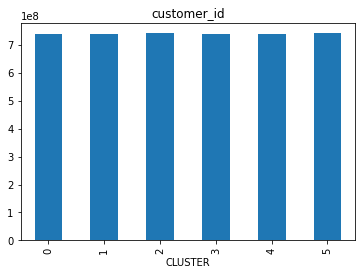

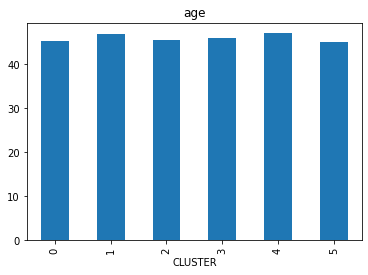

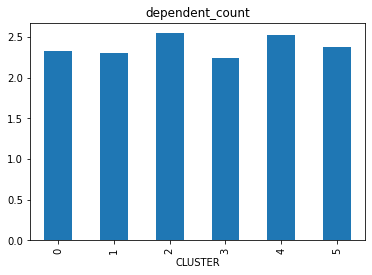

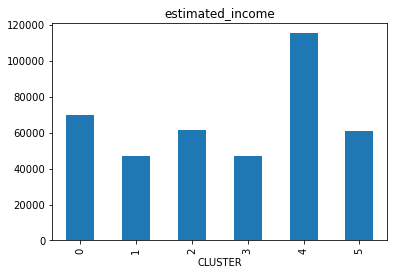

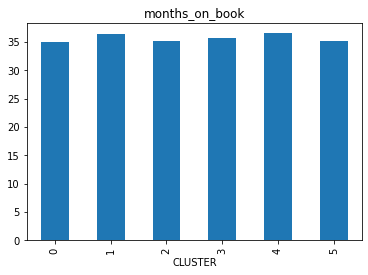

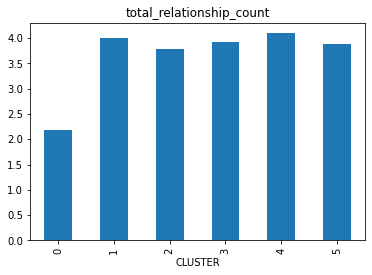

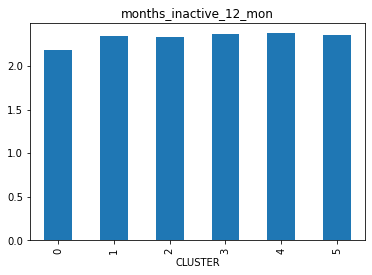

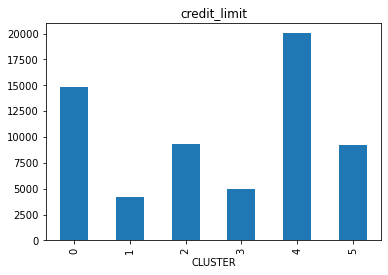

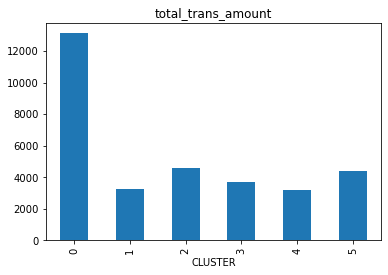

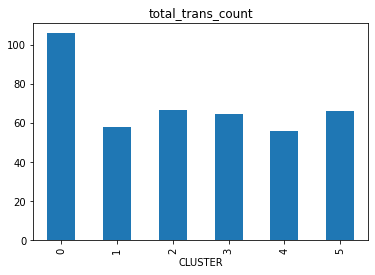

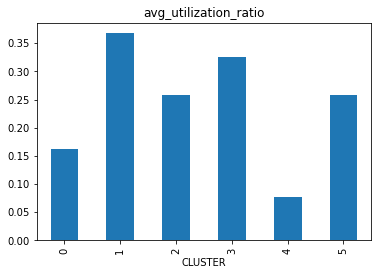

In [88]:
for col in a.columns:
    a[col].plot(kind='bar')
    plt.title(col)
    plt.show()
    

In [68]:
data.corr()

,customer_id,age,dependent_count,estimated_income,months_on_book,total_relationship_count,months_inactive_12_mon,credit_limit,total_trans_amount,total_trans_count,avg_utilization_ratio,CLUSTER
customer_id,1.000000,0.007613,0.006772,0.015787,0.134588,0.006907,0.005729,0.005708,-0.019692,-0.002961,0.000266,0.016405
age,0.007613,1.000000,-0.122254,0.032922,0.788912,-0.010931,0.054361,0.002476,-0.046446,-0.067097,0.007114,-0.005402
dependent_count,0.006772,-0.122254,1.000000,0.051620,-0.103062,-0.039076,-0.010768,0.068065,0.025046,0.049912,-0.037135,0.028119
estimated_income,0.015787,0.032922,0.051620,1.000000,0.027628,-0.007181,-0.002703,0.515863,0.015861,-0.039988,-0.277532,0.285153
months_on_book,0.134588,0.788912,-0.103062,0.027628,1.000000,-0.009203,0.074164,0.007507,-0.038591,-0.049819,-0.007541,-0.000810
total_relationship_count,0.006907,-0.010931,-0.039076,-0.007181,-0.009203,1.000000,-0.003675,-0.071386,-0.347229,-0.241891,0.067663,0.156592
months_inactive_12_mon,0.005729,0.054361,-0.010768,-0.002703,0.074164,-0.003675,1.000000,-0.020394,-0.036982,-0.042787,-0.007503,0.032871
credit_limit,0.005708,0.002476,0.068065,0.515863,0.007507,-0.071386,-0.020394,1.000000,0.171730,0.075927,-0.482965,0.237468
total_trans_amount,-0.019692,-0.046446,0.025046,0.015861,-0.038591,-0.347229,-0.036982,0.171730,1.000000,0.807192,-0.083034,-0.343914
total_trans_count,-0.002961,-0.067097,0.049912,-0.039988,-0.049819,-0.241891,-0.042787,0.075927,0.807192,1.000000,0.002838,-0.215332


<AxesSubplot:xlabel='age', ylabel='months_on_book'>

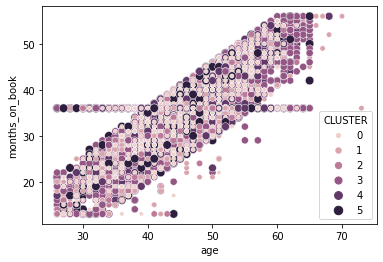

In [91]:
sns.scatterplot(x='age', y='months_on_book',data=data,hue='CLUSTER',size='CLUSTER')

<AxesSubplot:xlabel='total_trans_amount', ylabel='total_trans_count'>

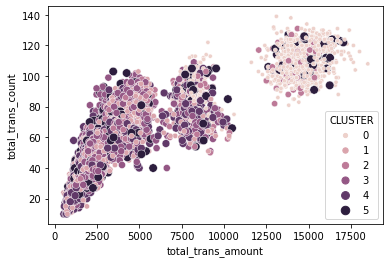

In [89]:
sns.scatterplot(x='total_trans_amount', y='total_trans_count',data=data,hue='CLUSTER',size='CLUSTER')

<AxesSubplot:xlabel='estimated_income', ylabel='credit_limit'>

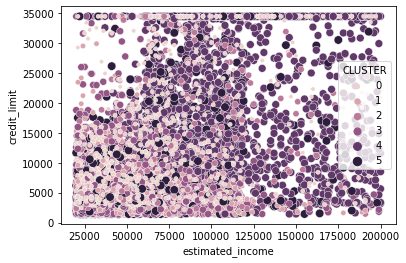

In [90]:
sns.scatterplot(x='estimated_income', y='credit_limit',data=data,hue='CLUSTER',size='CLUSTER')

<AxesSubplot:xlabel='credit_limit', ylabel='avg_utilization_ratio'>

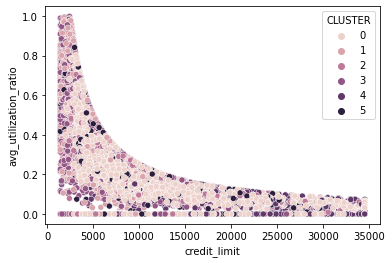

In [74]:
sns.scatterplot(x='credit_limit', y='avg_utilization_ratio',data=data,hue='CLUSTER')

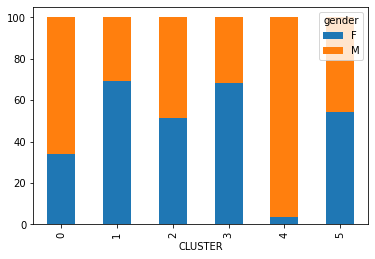

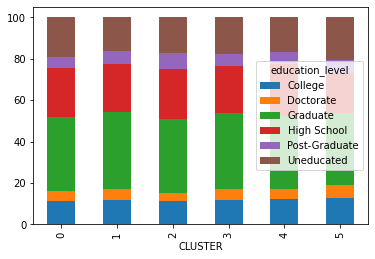

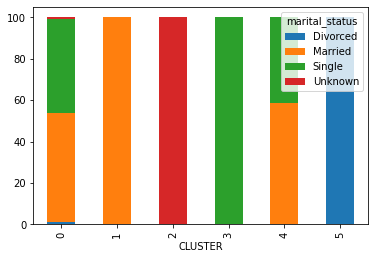

In [83]:
list_col=['gender','education_level', 'marital_status']
for col in list_col:
    cross=pd.crosstab(data['CLUSTER'], data[col],normalize='index')*100
    cross.plot(kind='bar',stacked=True)

 ##### Conclusions

We see that marital status has a big impact on the way the clusters were split. We see that cluster 2 is only married, cluster 3 is all unknown, cluster 4 are all single and cluster 6 are all divorced. The education level is split between all the clusters pretty evenly. In cluster 5 there are mainly males. Clusters 3 and 6  the genders are split pretty evenly. Cluster 5 has a very high estimated income and credit limit, cluster 4 is also pretty high and clusters 1 and 2 are quite low. The total trans amount and total trans count are very high in cluster 1.